In [1]:
import os
import cv2 # computer vision
import matplotlib.pyplot as plt

In [2]:
#pip install cv2

In [3]:
#pip install opencv-python

In [4]:
path1 = r"F:\IMARTICUS\Data\CNN Dataset\dogcat"
cate = ['dogs','cats']

In [5]:
#for i in cate:
#    folders = os.path.join(path1,i) # dog folder inside dogcat folder and then cat folder
#   for image in os.listdir(folders):
#        image_path = os.path.join(folders, image)
#        print(image_path)

In [6]:
#for i in cate:
#    folders = os.path.join(path1,i) # dog folder inside dogcat folder and then cat folder
#    for image in os.listdir(folders):
#        image_path = os.path.join(folders, image)
#        image_array = cv2.imread(image_path)
#        plt.imshow(image_array)
#        break
#        
# to make understand that we are able to read the images

In [7]:
image_size= 200 # hyper parameter
path1 = r"F:\IMARTICUS\Data\CNN Dataset\dogcat"
cate = ['dogs','cats']

input_image = []
for i in cate:
    folders = os.path.join(path1, i)
    label = cate.index(i)  # we need to tell software which image is of cat and which is of dog
    for image in os.listdir(folders):
        image_path = os.path.join(folders , image)
        image_array = cv2.imread(image_path)  #using the cv2 i am reading the image  and storing in variable image
        image_array = cv2.resize(image_array , (image_size , image_size))
        input_image.append([image_array , label])

In [8]:
type(input_image)

list

In [9]:
input_image[1200]

[array([[[228, 216, 206],
         [228, 217, 206],
         [232, 220, 210],
         ...,
         [143, 148, 147],
         [144, 147, 147],
         [144, 147, 148]],
 
        [[233, 221, 211],
         [232, 220, 210],
         [235, 223, 213],
         ...,
         [145, 150, 149],
         [147, 150, 150],
         [148, 150, 151]],
 
        [[232, 220, 209],
         [234, 222, 211],
         [238, 226, 216],
         ...,
         [146, 151, 150],
         [147, 150, 151],
         [148, 150, 151]],
 
        ...,
 
        [[228, 227, 230],
         [228, 227, 229],
         [231, 230, 232],
         ...,
         [243, 243, 243],
         [246, 246, 246],
         [246, 246, 246]],
 
        [[227, 226, 228],
         [226, 225, 227],
         [227, 226, 228],
         ...,
         [243, 243, 243],
         [245, 245, 245],
         [245, 245, 245]],
 
        [[227, 226, 228],
         [227, 226, 228],
         [227, 226, 228],
         ...,
         [244, 244, 244],
  

In [10]:
import numpy as np

In [11]:
np.random.shuffle(input_image) #to shuffle the image as the data for random sampling

In [12]:
x=[]
y=[]

for x_values, labels in input_image:
    x.append(x_values)
    y.append(labels)

In [13]:
len(x)

2023

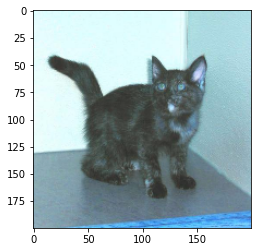

In [14]:
plt.imshow(x[1])

In [15]:
x= np.array(x)
y= np.array(y)

In [16]:
# if you want you can divide the data in train and test

In [17]:
x=x/255  #very essential step (kind of normalization of the data)

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.utils.np_utils import to_categorical

In [19]:
model=Sequential()
model.add(Conv2D(filters=120, kernel_size= (5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', input_shape=x.shape[1:]))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(x,y, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
26/26 [==============================] - 279s 9s/step - loss: 6.7136 - accuracy: 0.5043 - val_loss: 0.6936 - val_accuracy: 0.5111
Epoch 2/10
26/26 [==============================] - 178s 7s/step - loss: 0.6625 - accuracy: 0.5853 - val_loss: 0.6803 - val_accuracy: 0.6123
Epoch 3/10
26/26 [==============================] - 149s 6s/step - loss: 0.5433 - accuracy: 0.7485 - val_loss: 0.7430 - val_accuracy: 0.5531
Epoch 4/10
26/26 [==============================] - 171s 7s/step - loss: 0.3611 - accuracy: 0.8486 - val_loss: 0.8072 - val_accuracy: 0.6123
Epoch 5/10
26/26 [==============================] - 148s 6s/step - loss: 0.3359 - accuracy: 0.8974 - val_loss: 0.8016 - val_accuracy: 0.6049
Epoch 6/10
26/26 [==============================] - 172s 7s/step - loss: 0.1619 - accuracy: 0.9561 - val_loss: 0.9480 - val_accuracy: 0.6000
Epoch 7/10
26/26 [==============================] - 202s 8s/step - loss: 0.0900 - accuracy: 0.9784 - val_loss: 1.2642 - val_accuracy: 0.6099
Epoch 8/10
26

In [21]:
model.predict(x)

array([[9.9999166e-01, 8.3616469e-06],
       [4.6239821e-03, 9.9537599e-01],
       [9.9983537e-01, 1.6454545e-04],
       ...,
       [1.7019320e-06, 9.9999833e-01],
       [5.7645598e-06, 9.9999428e-01],
       [9.7560024e-01, 2.4399729e-02]], dtype=float32)

In [22]:
pred = model.predict(x)
pred_classes  = np.argmax(pred , axis = 1)
pred_classes

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix
tab= confusion_matrix(y,pred_classes)
tab

array([[911, 101],
       [ 60, 951]], dtype=int64)